In [1]:
import pandas as pd
import numpy as np
from utils.dates import create_cal_data
from utils.column_mapping import map_columns
from aggregation import compute_average_loadshapes
import matplotlib.pyplot as plt
import os, sys

In [2]:
#indir = r"/mnt/g/Shared drives/BTO Topic 2  Integrating EE & DR/Task 2/Load_Shape_Data/ResStock/ResStock_update_20200617/building_load_shapes"
indir = r"/mnt/g/Shared drives/BTO Topic 2  Integrating EE & DR/Task 2/Load_Shape_Data/ComSstock"
files = pd.read_csv(os.path.join(indir,'file_names.txt'), sep=':', header=None, index_col=0)
#Get unique buildings
buildings = files[1].str.strip().str.slice(stop=-10).unique()
buildings

array(['USA_CA_Arcata.725945_2016-Mobile_Home_0',
       'USA_CA_Arcata.725945_2016-Multi-Family_with_2_-_4_Units_0',
       'USA_CA_Arcata.725945_2016-Multi-Family_with_5+_Units_0',
       'USA_CA_Arcata.725945_2016-Single-Family_Attached_0',
       'USA_CA_Arcata.725945_2016-Single-Family_Detached_0',
       'USA_CA_Bakersfield.Meadows.723840_2016-Mobile_Home_0',
       'USA_CA_Bakersfield.Meadows.723840_2016-Multi-Family_with_2_-_4_Units_0',
       'USA_CA_Bakersfield.Meadows.723840_2016-Multi-Family_with_5+_Units_0',
       'USA_CA_Bakersfield.Meadows.723840_2016-Single-Family_Attached_0',
       'USA_CA_Bakersfield.Meadows.723840_2016-Single-Family_Detached_0',
       'USA_CA_Barstow.Daggett.723815_2016-Mobile_Home_0',
       'USA_CA_Barstow.Daggett.723815_2016-Multi-Family_with_2_-_4_Units_0',
       'USA_CA_Barstow.Daggett.723815_2016-Multi-Family_with_5+_Units_0',
       'USA_CA_Barstow.Daggett.723815_2016-Single-Family_Attached_0',
       'USA_CA_Barstow.Daggett.723815_2016-Si

In [3]:
bldg = 'USA_TX_Houston.Intercontin.722430_2016-Single-Family_Detached_0'

In [4]:
upgrade = 5
col_map = pd.read_csv(os.path.join(indir, '../..','drpath column mapping.csv'))
col_map = col_map.loc[col_map.iloc[:,1]!='total']
col_map#.iloc[:,0]#head()

base_lshp = pd.read_csv(os.path.join(indir, bldg+'-upgrade_0.csv'), index_col=0)
ee_lshp = pd.read_csv(os.path.join(indir, bldg+'-upgrade_{u}.csv'.format(u=upgrade)), 
                      index_col=0)
base_lshp = map_columns(base_lshp, col_map, map_to=3)
ee_lshp = map_columns(ee_lshp, col_map, map_to=3)
base_lshp.head()

Appliances   Cooling   Heating  Lighting     Other  Plug Loads  \
0    0.165281  0.000133  0.704644  0.088353  0.042714    0.362769   
1    0.148425  0.000066  0.736426  0.053012  0.039069    0.335562   
2    0.126562  0.000053  0.841463  0.035341  0.036835    0.335562   
3    0.118536  0.000063  0.894581  0.035341  0.037784    0.326492   
4    0.118205  0.000151  0.844628  0.039291  0.044236    0.299285   

   Water Heating  
0       0.007992  
1       0.010729  
2       0.009910  
3       0.010145  
4       0.018436

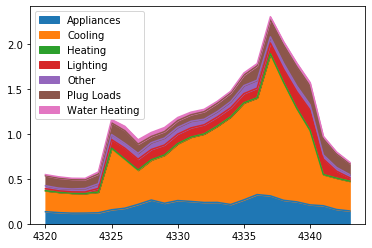

In [9]:
day = 180
ee_lshp[day*24:(day+1)*24].plot.area()

In [ ]:
def plot_sav_shp(base_lshp, ee_lshp, ax=None):
    savshp = base_lshp.sub(ee_lshp)

(-0.2557799235488975, 2.8167628299570664)

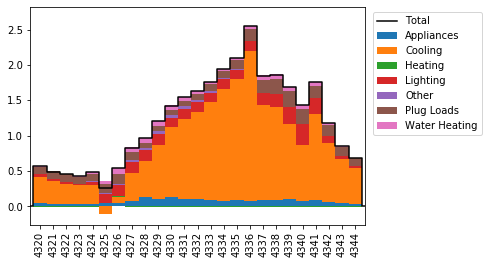

In [10]:
savshp = base_lshp.sub(ee_lshp)

df = savshp.loc[day*24:(day+1)*24]

fig,ax=plt.subplots()
total = df.sum(axis=1)
df.plot.bar(stacked=True, ax=ax, width=1)
ax.step(np.arange(len(total)+2)-1, [0]+list(total.values)+[0], 
        color='k', label='Total', where='mid')
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left')
ylim = ax.get_ylim()
ax.set_ylim([min(0,ylim[0]*1.05), max(0,ylim[1]*1.05)])

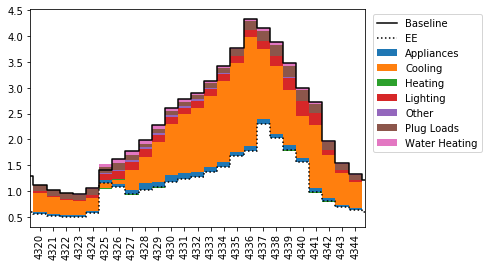

In [11]:
xarr = np.arange(len(total)+2)-1

base = base_lshp.loc[day*24-1:(day+1)*24+1].sum(axis=1)
ee = ee_lshp.loc[day*24-1:(day+1)*24+1].sum(axis=1)

fig,ax=plt.subplots()

df.plot.bar(stacked=True, ax=ax, width=1, bottom=ee[1:-1])

ax.step(xarr, list(base.values), 
        color='k', label='Baseline', where='mid')
ax.step(xarr, list(ee.values), 
        color='k', linestyle=':', label='EE', where='mid')
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left')
#ax.set_ylim([min(0,total.min()*1.05), max(0,total.max()*1.05)])

In [12]:
len(ee)

27

In [80]:
cur_pos

3600         NaN
3601    0.000090
3602    0.000020
3603    0.000102
3604         NaN
3605         NaN
3606    0.029553
3607    0.000034
3608         NaN
3609    0.000021
3610    0.000045
3611    0.000043
3612         NaN
3613    0.000007
3614    0.000049
3615         NaN
3616    0.000110
3617    0.000083
3618         NaN
3619         NaN
3620         NaN
3621    0.000038
3622         NaN
3623    0.306685
3624    0.000122
dtype: float64